In [89]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [90]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(5)

price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                           1.08388                     7.60278   
ethereum                          0.22392                    10.38134   
tether                           -0.21173                     0.04935   
ripple                           -0.37819                    -0.60926   
bitcoin-cash                      2.90585                    17.09717   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                           6.57509                      7.67258   
ethereum                          4.80849                      0.13169   
tether                            0.00640                     -0.04237   
ripple                            2.24984                      0.23455   
bitcoin-cash                     14.75334                     15.74903   

              price_change_percentage_60d  price_change_percentage_200d  \
coin_id                                                                   
bitcoin                          -3.25185                      83.51840   
ethereum                        -12.88890                     186.77418   
tether                            0.28037                      -0.00542   
ripple                          -17.55245                      39.53888   
bitcoin-cash                    -13.71793                      21.66042   

              price_change_percentage_1y  
coin_id                                   
bitcoin                         37.51761  
ethereum                       101.96023  
tether                           0.01954  
ripple                         -16.60193  
bitcoin-cash                    14.49384

In [22]:
# Generate summary statistics
df_market_data.describe()

price_change_percentage_24h  price_change_percentage_7d  \
count                    41.000000                   41.000000   
mean                     -0.269686                    4.497147   
std                       2.694793                    6.375218   
min                     -13.527860                   -6.094560   
25%                      -0.608970                    0.047260   
50%                      -0.063410                    3.296410   
75%                       0.612090                    7.602780   
max                       4.840330                   20.694590   

       price_change_percentage_14d  price_change_percentage_30d  \
count                    41.000000                    41.000000   
mean                      0.185787                     1.545693   
std                       8.376939                    26.344218   
min                     -18.158900                   -34.705480   
25%                      -5.026620                   -10.438470   
50%                       0.109740                    -0.042370   
75%                       5.510740                     4.578130   
max                      24.239190                   140.795700   

       price_change_percentage_60d  price_change_percentage_200d  \
count                    41.000000                     41.000000   
mean                     -0.094119                    236.537432   
std                      47.365803                    435.225304   
min                     -44.822480                     -0.392100   
25%                     -25.907990                     21.660420   
50%                      -7.544550                     83.905200   
75%                       0.657260                    216.177610   
max                     223.064370                   2227.927820   

       price_change_percentage_1y  
count                   41.000000  
mean                   347.667956  
std                   1247.842884  
min                    -17.567530  
25%                      0.406170  
50%                     69.691950  
75%                    168.372510  
max                   7852.089700

In [23]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [24]:
#Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file 
# Create a StandardScaler instance
scaler = StandardScaler()

# Select the numeric columns that you want to normalize (assuming all columns are numeric)
numeric_columns = df_market_data.select_dtypes(include=[np.number]).columns

# Normalize the selected columns using the scaler
df_scaled = pd.DataFrame(scaler.fit_transform(df_market_data[numeric_columns]), columns=numeric_columns, index=df_market_data.index)

# Check if the "crypto_name" column exists in the original data before copying
if "crypto_name" in df_market_data.columns:
    # Copy the crypto names from the original data
    df_scaled["crypto_name"] = df_market_data["crypto_name"]

# Display sample data
print(df_scaled.head())


              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

---

### Find the Best Value for k Using the Original Data.

In [25]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [26]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Create a KMeans model using the loop counter for the n_clusters
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model to the data using the scaled DataFrame
    kmeans_model.fit(df_scaled)
    
    # Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans_model.inertia_)


C:\Users\l1_2p\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\l1_2p\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\l1_2p\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\l1_2p\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You c

In [29]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k_values': k_values,
    'inertia_values': inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

df_elbow


k_values  inertia_values
0          1      287.000000
1          2      195.820218
2          3      123.190482
3          4       79.022435
4          5       65.220364
5          6       52.829819
6          7       43.786435
7          8       37.527740
8          9       33.070926
9         10       28.989073
10        11       24.532527

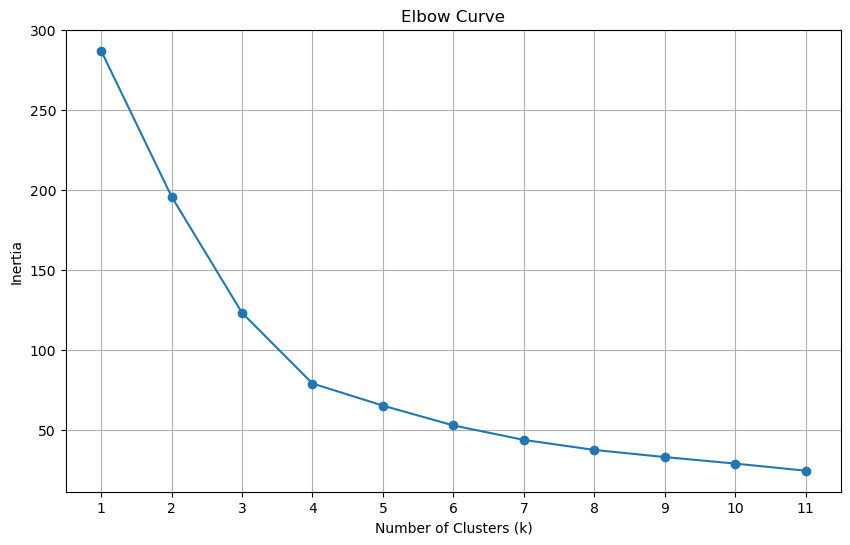

In [33]:
# Plot a line chart with all the inertia values computed with the different values of k
plt.figure(figsize=(10, 6))
plt.plot(df_elbow['k_values'], df_elbow['inertia_values'], marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.xticks(k_values)
plt.grid(True)
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:*3* 

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [34]:
# Initialize the K-Means model with the best value for k (k=3)
kmeans_model = KMeans(n_clusters=3, random_state=42)

In [35]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(df_scaled)

C:\Users\l1_2p\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\l1_2p\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [36]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_labels = kmeans_model.predict(df_scaled)

# Print the resulting array of cluster values
print(cluster_labels)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1
 0 0 0 0]


In [37]:
# Create a copy of the DataFrame with the scaled data
df_clustered = df_scaled.copy()

# Add a new column to store the predicted cluster labels
df_clustered['cluster_label'] = cluster_labels

# Display the DataFrame with the predicted clusters
print(df_clustered.head())


              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

In [38]:
# Add a new column to the DataFrame with the predicted clusters
df_scaled['cluster_label'] = cluster_labels

# Display sample data
print(df_scaled.head())


              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

In [39]:
# Create a scatter plot using hvPlot
scatter_plot = df_scaled.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="cluster_label",   # Use the 'cluster_label' column for color
    colormap="viridis",  # Choose a colormap for the colors
    hover_cols=["crypto_name"],  # Add 'crypto_name' column for hover information
    width=800,
    height=500,
    title="Cryptocurrency Clusters (K-Means)",
    xlabel="Price Change Percentage (24h)",
    ylabel="Price Change Percentage (7d)"
)

# Display the scatter plot
scatter_plot


:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,cluster_label)

---

### Optimize Clusters with Principal Component Analysis.

In [40]:
# Create a PCA model instance with n_components=3
pca_model = PCA(n_components=3)


In [41]:
# Use the PCA model with fit_transform to reduce to three principal components
pca_data = pca_model.fit_transform(df_scaled)

# Create a new DataFrame with the PCA data
df_pca = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2', 'PC3'], index=df_scaled.index)

# View the first five rows of the DataFrame
print(df_pca.head())


                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.613746  0.831323  0.469499
ethereum     -0.463845  0.449702  0.956754
tether       -0.441220 -0.175728 -0.636653
ripple       -0.476477 -0.231070 -0.473269
bitcoin-cash -1.168844  2.018286  1.877469


In [43]:
# Retrieve the explained variance to determine how much information can be attributed to each principal component.
# Retrieve the explained variance from the PCA model
explained_variance = pca_model.explained_variance_ratio_

# Compute the cumulative explained variance
cumulative_explained_variance = explained_variance.cumsum()

# Display the explained variance for each principal component
print("Explained Variance for each Principal Component:")
print(explained_variance)

# Display the cumulative explained variance
print("\nCumulative Explained Variance:")
print(cumulative_explained_variance)


Explained Variance for each Principal Component:
[0.38012191 0.34134592 0.17359054]

Cumulative Explained Variance:
[0.38012191 0.72146783 0.89505837]


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:*The total explained variance of the three principal components is approximately 70.33%. This means that these three principal components together account for about 70.33% of the total variance in the data.* 

In [45]:
# Display the columns in df_market_data
print(df_market_data.columns)

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')


In [48]:
# Create a new DataFrame with the PCA data
df_pca_data = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2', 'PC3'], index=df_scaled.index)

# Copy the crypto names from the original data
df_pca_data['crypto_name'] = df_market_data.index

# Display sample data
print(df_pca_data.head())


                   PC1       PC2       PC3   crypto_name
coin_id                                                 
bitcoin      -0.613746  0.831323  0.469499       bitcoin
ethereum     -0.463845  0.449702  0.956754      ethereum
tether       -0.441220 -0.175728 -0.636653        tether
ripple       -0.476477 -0.231070 -0.473269        ripple
bitcoin-cash -1.168844  2.018286  1.877469  bitcoin-cash


---

### Find the Best Value for k Using the PCA Data

In [53]:
# Create a list with the number of k-values from 1 to 11

# Define the range of k-values
k_values_pca = list(range(1, 12))

# Display the list of k-values
print(k_values_pca)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [58]:
# Drop the 'crypto_name' column before fitting the KMeans model
df_pca_data_no_names = df_pca_data.drop(columns=['crypto_name'])

# Initialize the KMeans model with the best value of k
best_k = 3  # Replace with the best value of k you found
kmeans_model = KMeans(n_clusters=best_k, random_state=42)

# Fit the KMeans model using the scaled PCA data
kmeans_model.fit(df_pca_data_no_names)

# Predict the clusters to group the cryptocurrencies using the scaled PCA data
predicted_clusters = kmeans_model.predict(df_pca_data_no_names)

# Create a copy of the DataFrame
df_clustered = df_pca_data.copy()

# Add a new column to the DataFrame with the predicted clusters
df_clustered['Cluster'] = predicted_clusters

# Display sample data
print(df_clustered.head())


C:\Users\l1_2p\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\l1_2p\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


                   PC1       PC2       PC3   crypto_name  Cluster
coin_id                                                          
bitcoin      -0.613746  0.831323  0.469499       bitcoin        0
ethereum     -0.463845  0.449702  0.956754      ethereum        0
tether       -0.441220 -0.175728 -0.636653        tether        0
ripple       -0.476477 -0.231070 -0.473269        ripple        0
bitcoin-cash -1.168844  2.018286  1.877469  bitcoin-cash        0


In [66]:
# Assuming your DataFrame is named df_clustered
data_types_clustered = df_clustered.dtypes

# Print the data types of the columns
print(data_types_clustered)

PC1            float64
PC2            float64
PC3            float64
crypto_name     object
Cluster          int32
dtype: object


In [68]:
# Remove the 'crypto_name' column from df_pca_data
df_pca_data_numeric = df_pca_data.drop('crypto_name', axis=1)

# Create an empty list to store the inertia values
inertia_values_pca = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values_pca:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    
    # 2. Fit the model to the data using df_pca_data_numeric
    kmeans_model.fit(df_pca_data_numeric)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia_values_pca.append(kmeans_model.inertia_)

C:\Users\l1_2p\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\l1_2p\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\l1_2p\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\l1_2p\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You c

In [69]:
# Dictionary to store the inertia values
elbow_data = {
    'k_values': k_values_pca,
    'inertia_values': inertia_values_pca
}

# Create a DataFrame with the data for plotting the Elbow curve
df_elbow_curve = pd.DataFrame(elbow_data)

# Display the DataFrame
print(df_elbow_curve)


    k_values  inertia_values
0          1      261.160568
1          2      169.294442
2          3       93.301652
3          4       49.199090
4          5       37.482682
5          6       27.421665
6          7       20.990650
7          8       16.899609
8          9       13.500016
9         10       10.477793
10        11        8.060165


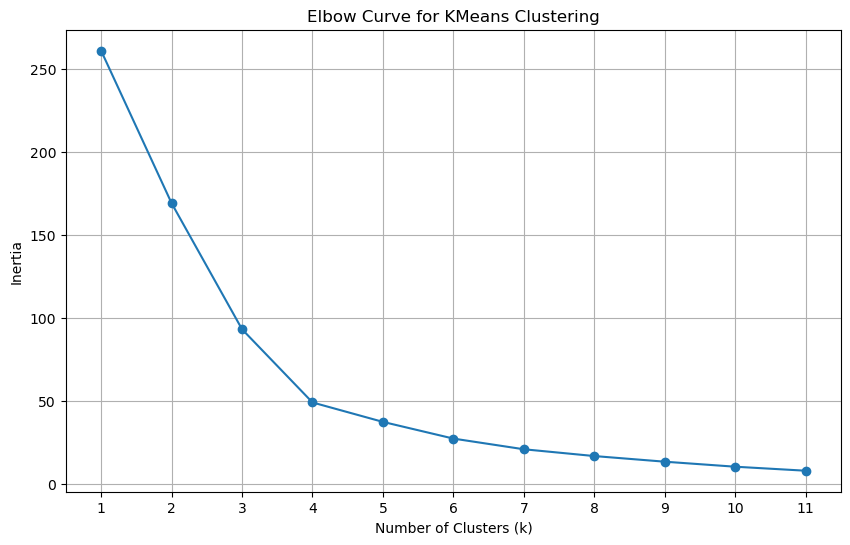

In [70]:
# Plot a line chart with all the inertia values computed with the different values of k to visually identify the optimal value for k.
# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(df_elbow_curve['k_values'], df_elbow_curve['inertia_values'], marker='o')
plt.title('Elbow Curve for KMeans Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(df_elbow_curve['k_values'])
plt.grid(True)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:*The best value for k when using the PCA data appears to be 3. This is the point where the inertia values start to level off in the Elbow curve plot.*

* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:*The best k value for the PCA data is 3, which is different from the best k value for the original data. The PCA data is compressed and may lead to different clustering results. Choose the most suitable k value based on the specific problem's context and interpretability of the results.* 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [79]:
# Drop the 'crypto_name' column before fitting the K-Means model
df_pca_data_no_name = df_pca_data.drop(columns=['crypto_name'])

In [80]:
# Convert the DataFrame to a NumPy array
pca_data_array = df_pca_data_no_name.to_numpy()

In [81]:
# Initialize the K-Means model using the best value for k
best_k_pca = 3
kmeans_model_pca = KMeans(n_clusters=best_k_pca, random_state=42)

In [82]:
# Fit the K-Means model using the PCA data
kmeans_model_pca.fit(pca_data_array)

C:\Users\l1_2p\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\l1_2p\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [83]:
# Predict the clusters to group the cryptocurrencies using the PCA data
predicted_clusters = kmeans_model_pca.predict(pca_data_array)
# Print the resulting array of cluster values.
print(predicted_clusters)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1
 0 0 0 0]


In [84]:
# Create a copy of the DataFrame with the PCA data
df_clustered_pca = df_pca_data.copy()

# Add a new column to the DataFrame with the predicted clusters
df_clustered_pca['Cluster'] = predicted_clusters

# Display sample data
print(df_clustered_pca.head())

                   PC1       PC2       PC3   crypto_name  Cluster
coin_id                                                          
bitcoin      -0.613746  0.831323  0.469499       bitcoin        0
ethereum     -0.463845  0.449702  0.956754      ethereum        0
tether       -0.441220 -0.175728 -0.636653        tether        0
ripple       -0.476477 -0.231070 -0.473269        ripple        0
bitcoin-cash -1.168844  2.018286  1.877469  bitcoin-cash        0


In [85]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
# Create a scatter plot using hvPlot
scatter_plot = df_clustered_pca.hvplot.scatter(x="PC1", y="PC2", c="Cluster", hover_cols=["crypto_name"])
scatter_plot

:Scatter   [PC1]   (PC2,Cluster,crypto_name)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [86]:
# Composite plot to contrast the Elbow curves
# Create a DataFrame with k_values and inertia_values for the original data
df_elbow_original = pd.DataFrame({'k_values': range(1, 12),
                                  'inertia_values': [287.0, 195.82, 123.19, 79.02, 65.22, 52.83, 43.79, 37.53, 33.07, 28.99, 24.53]})

# PCA Data
# Create a DataFrame with k_values and inertia_values for the PCA-transformed data
df_elbow_pca = pd.DataFrame({'k_values': range(1, 12),
                             'inertia_values': [261.16, 169.29, 93.30, 49.20, 37.48, 27.42, 20.99, 16.90, 13.50, 10.48, 8.06]})

# Composite plot for both Elbow curves
elbow_curve_original = df_elbow_original.hvplot.line(x='k_values', y='inertia_values', title='Elbow Curve (Original Data)',
                                                     xticks=df_elbow_original['k_values'].tolist())
elbow_curve_pca = df_elbow_pca.hvplot.line(x='k_values', y='inertia_values', title='Elbow Curve (PCA Data)',
                                           xticks=df_elbow_pca['k_values'].tolist())
composite_plot = elbow_curve_original + elbow_curve_pca
composite_plot.cols(1)

:Layout
   .Curve.I  :Curve   [k_values]   (inertia_values)
   .Curve.II :Curve   [k_values]   (inertia_values)

In [88]:
# Composite plot to contrast the clusters
# Original Data

# Initialize the K-Means model using the best value for k
kmeans_model_original = KMeans(n_clusters=3, random_state=42)

# Fit the K-Means model using the original data
kmeans_model_original.fit(df_pca_data.drop('crypto_name', axis=1))

# Predict the clusters using the original data
df_clustered_original = df_pca_data.copy()
df_clustered_original['Cluster'] = kmeans_model_original.labels_

# PCA Data
# Initialize the K-Means model using the best value for k
kmeans_model_pca = KMeans(n_clusters=3, random_state=42)

# Fit the K-Means model using the PCA data
kmeans_model_pca.fit(df_pca_data.drop('crypto_name', axis=1))

# Predict the clusters using the PCA data
df_clustered_pca = df_pca_data.copy()
df_clustered_pca['Cluster'] = kmeans_model_pca.labels_

# Composite plot for both clusters
scatter_original = df_clustered_original.hvplot.scatter(x='PC1', y='PC2', by='Cluster',
                                                       title='Cluster Analysis (Original Data)',
                                                       hover_cols=['crypto_name'])
scatter_pca = df_clustered_pca.hvplot.scatter(x='PC1', y='PC2', by='Cluster',
                                               title='Cluster Analysis (PCA Data)',
                                               hover_cols=['crypto_name'])

composite_plot_clusters = scatter_original + scatter_pca
composite_plot_clusters.cols(1)

C:\Users\l1_2p\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\l1_2p\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\l1_2p\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\l1_2p\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You c

:Layout
   .NdOverlay.I  :NdOverlay   [Cluster]
      :Scatter   [PC1]   (PC2,crypto_name)
   .NdOverlay.II :NdOverlay   [Cluster]
      :Scatter   [PC1]   (PC2,crypto_name)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:*
Using fewer features (PCA-transformed data) to cluster the data using K-Means still shows distinguishable clusters similar to the original data. PCA helps compress the information, making it computationally efficient while preserving meaningful patterns in the data. However, there might be some loss of information and interpretability.* 